## Finding Your Way In The City

In this notebook you'll combine the work of previous exercises to calculate a minimal series of waypoints in order to get from a start location to a goal location.

You'll reuse and modify your algorithms from:

- A*
- Configuration Space
- Collinearity and/or Bresenham

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from grid import create_grid
from planning import a_star

%matplotlib inline

#from bresenham import bresenham

In [2]:
plt.rcParams['figure.figsize'] = 12, 12

You'll notice we've imported `create_grid`, and `a_star`. These are functions you've implemented in previous exercises, and here you'll use them to create a map and find a path from a starting position to a goal position.

To read the function signature and documentation execute `?` followed by the function name in a cell. In the example below we'll check the documentation for `create_grid`.

In [3]:
?create_grid

In [4]:
?a_star

If you would like to alter these implementations, you can modify [grid.py](/edit/grid.py) and [planning.py](/edit/planning.py) in the current directory.

In [5]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
print(data)

[[-310.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-300.2389   -439.2315     85.5         5.          5.         85.5     ]
 [-290.2389   -439.2315     85.5         5.          5.         85.5     ]
 ..., 
 [ 257.8061    425.1645      1.75852     1.292725    1.292725    1.944791]
 [ 293.9967    368.3391      3.557666    1.129456    1.129456    3.667319]
 [ 281.5162    354.4156      4.999351    1.053772    1.053772    4.950246]]


In [6]:
# Static drone altitude (meters)
drone_altitude = 5

# Minimum distance stay away from obstacle (meters)
safe_distance = 3

In [7]:
# TODO: Use `create_grid` to create a grid configuration space of
# the obstacle data.
grid = create_grid(data, drone_altitude, safe_distance)

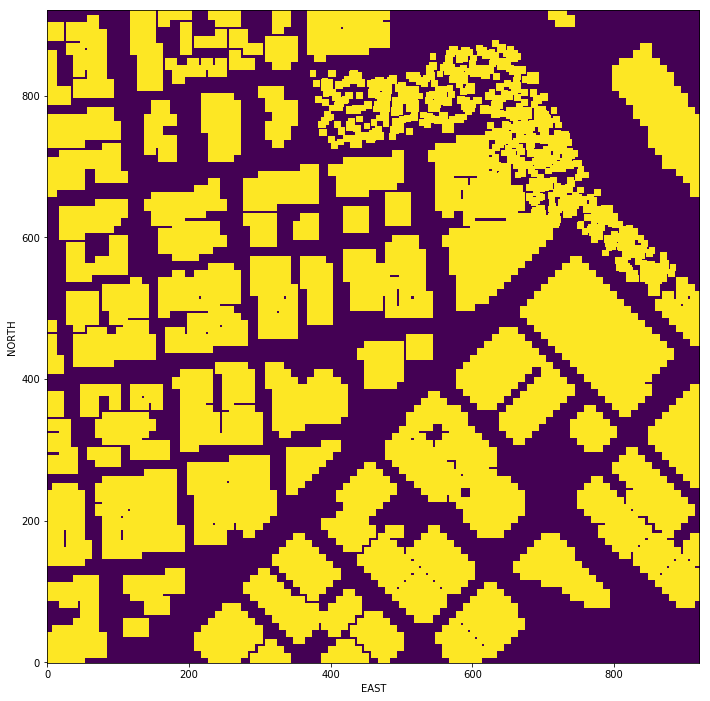

In [8]:
# equivalent to
# plt.imshow(np.flip(grid, 0))
plt.imshow(grid, origin='lower') 

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

Next you'll compute the path from a start location to a goal location using A*.

Start and goal coordinates in *(north, east)*.

In [9]:
start_ne = (25,  100)
goal_ne = (750, 370)

Write a heuristic function.

In [10]:
def heuristic_func(position, goal_position):
    # TODO: write a heuristic!
    x, y = position
    x_goal, y_goal = goal_position
    h = np.sqrt((np.square(x - x_goal) + np.square(y - y_goal)))
    return h

Compute the lowest cost path with `a_star`. 

In [11]:
# TODO: use `a_star` to compute the lowest cost path
path, cost = a_star(grid, heuristic_func, start_ne, goal_ne)
print(len(path), cost)

Found a path.
1024 1023.0


Let's plot the path!

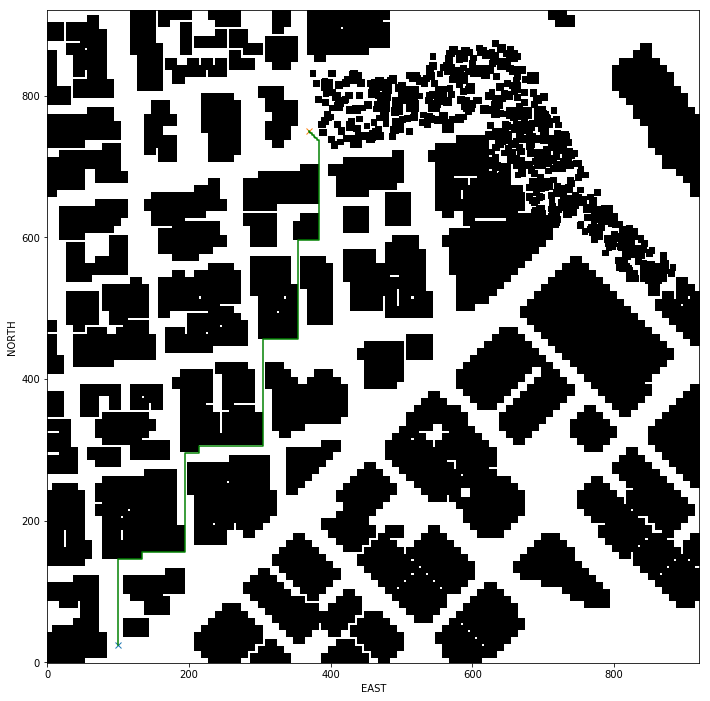

In [12]:
plt.imshow(grid, cmap='Greys', origin='lower')

# For the purposes of the visual the east coordinate lay along
# the x-axis and the north coordinates long the y-axis.
plt.plot(start_ne[1], start_ne[0], 'x')
plt.plot(goal_ne[1], goal_ne[0], 'x')

if path is not None:
    pp = np.array(path)
    plt.plot(pp[:, 1], pp[:, 0], 'g')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()

Pretty neat! Unfortunately this path is impractical, the drone would be constantly stopping and going since each grid cell visited is synonymous with a waypoint. Ideally, we'd like to only consider a new waypoint when the drone's direction changes. Path pruning is one way to achieve this result.

### Path Pruning

In [13]:
def point(p):
    return np.array([p[0], p[1], 1.]).reshape(1, -1)

def collinearity_check(p1, p2, p3, epsilon=1e-6):   
    m = np.concatenate((p1, p2, p3), 0)
    det = np.linalg.det(m)
    return abs(det) < epsilon

Complete the `prune_path` function below. It should return a new path much shorter than the original.

In [14]:
def prune_path(path):
    
    pruned_path = [p for p in path]
    # TODO: prune the path!
    i = 0
    while i < (len(pruned_path) - 2):
        p1 = point(pruned_path[i])
        p2 = point(pruned_path[i+1])
        p3 = point(pruned_path[i+2])
        if collinearity_check(p1, p2, p3):
            pruned_path.remove(pruned_path[i+1])
        else:
            i += 1        
        
    return pruned_path

Prune the path.

In [15]:
pruned_path = prune_path(path)
print(len(pruned_path))

42


In [16]:
pruned_path

[(25, 100),
 (146, 100),
 (146, 134),
 (156, 134),
 (156, 194),
 (296, 194),
 (296, 214),
 (306, 214),
 (306, 304),
 (456, 304),
 (456, 354),
 (596, 354),
 (596, 384),
 (736, 384),
 (736, 383),
 (737, 383),
 (737, 382),
 (738, 382),
 (738, 381),
 (739, 381),
 (739, 380),
 (740, 380),
 (740, 379),
 (741, 379),
 (741, 378),
 (742, 378),
 (742, 377),
 (743, 377),
 (743, 376),
 (744, 376),
 (744, 375),
 (745, 375),
 (745, 374),
 (746, 374),
 (746, 373),
 (747, 373),
 (747, 372),
 (748, 372),
 (748, 371),
 (749, 371),
 (749, 370),
 (750, 370)]

Replot the path, it will be the same as before but the drone flight will be much smoother.

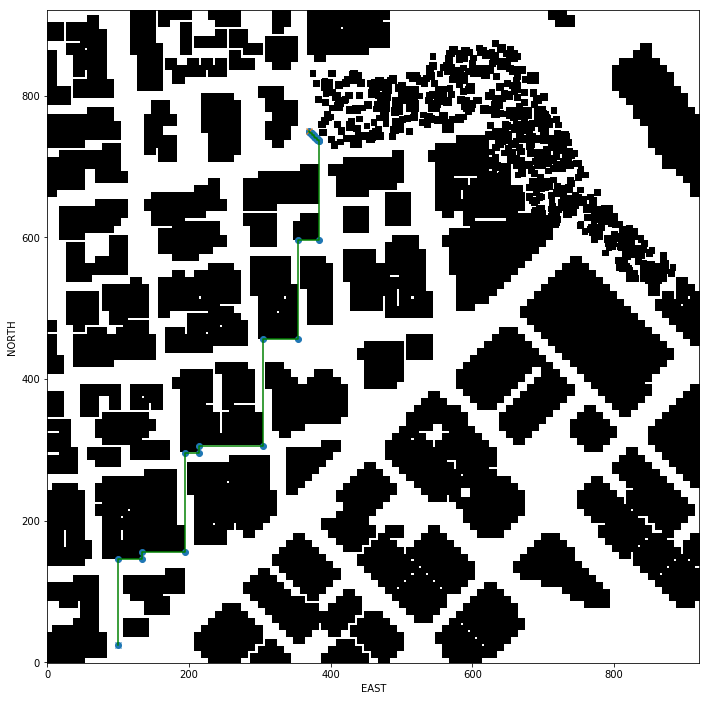

In [18]:
plt.imshow(grid, cmap='Greys', origin='lower')

plt.plot(start_ne[1], start_ne[0], 'x')
plt.plot(goal_ne[1], goal_ne[0], 'x')

if pruned_path is not None:
    pp = np.array(pruned_path)
    plt.plot(pp[:, 1], pp[:, 0], 'g')
    plt.scatter(pp[:, 1], pp[:, 0])

plt.xlabel('EAST')
plt.ylabel('NORTH')

plt.show()

Now the waypoints symbolize a change in direction, much better!

[solution](/notebooks/A-Star-City-Solution.ipynb)